## PCA for the Dimension reduction


In [4]:
import numpy as np
import pandas as pd

In [21]:
np.random.seed(22)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=["Feature1","Feature2","Feature3"])
df["target"] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=["Feature1","Feature2","Feature3"])
df1["target"] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40, random_state=23).reset_index(drop=True)

In [22]:
df.head()

,Feature1,Feature2,Feature3,target
0,0.432289,-0.135804,-0.941106,1
1,1.950711,1.760372,1.011504,0
2,1.046729,0.629143,0.363059,1
3,0.685177,1.490315,1.354976,0
4,0.116857,2.497248,0.353455,0


In [24]:
import plotly.express as px
# y_train_trf = y_train.astype(str)

fig = px.scatter_3d(df,x = df["Feature1"], y = df["Feature2"],z =df["Feature3"],color=df["target"].astype('str'))

fig.update_traces(marker= dict(size = 12, line = dict(width = 2,
                                                      color = "DarkSlateGrey")),
                                                      selector=dict(mode = "markers"))

fig.show()

In [26]:
# step 1 - Apply Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])


In [27]:
# step 2 - Find the Covariance Matrix

covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1],df.iloc[:,2]])
print("Covariance Matrix :\n", covariance_matrix)

Covariance Matrix :
 [[1.02564103 0.01666921 0.33470541]
 [0.01666921 1.02564103 0.17173846]
 [0.33470541 0.17173846 1.02564103]]


In [28]:
# step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [29]:
eigen_values

array([1.40878759, 0.65602644, 1.01210904])

In [32]:
eigen_vectors

array([[-0.62677889, -0.63216873,  0.45553366],
       [-0.34125321, -0.30286621, -0.88984173],
       [-0.70049587,  0.71318634,  0.02589946]])

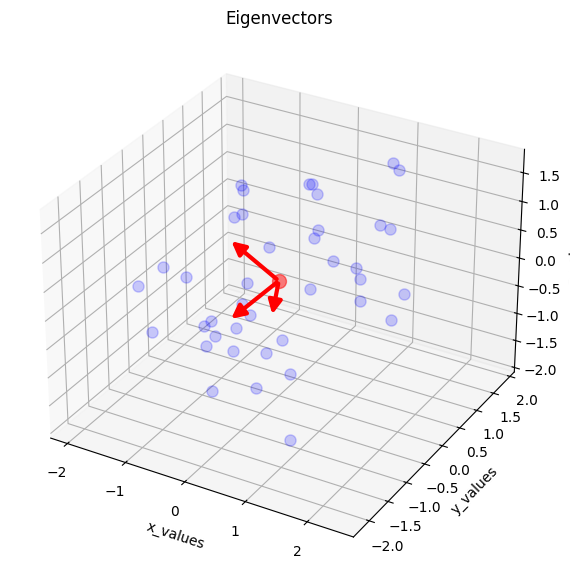

In [38]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        M = self.axes.get_proj() 
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
    
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)
    
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['Feature1'], df['Feature2'], df['Feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['Feature1'].mean()], [df['Feature2'].mean()], [df['Feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['Feature1'].mean(), v[0]], [df['Feature2'].mean(), v[1]], [df['Feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [39]:
pc = eigen_vectors[0:2]
pc



array([[-0.62677889, -0.63216873,  0.45553366],
       [-0.34125321, -0.30286621, -0.88984173]])

In [41]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.546005,1.807876,1
1,-1.230901,-1.212413,0
2,-0.536390,0.028409,1
3,-0.224000,-1.149728,0
4,-0.981260,-0.139073,0


In [42]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     